<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

# Graphical methods of normality tests

In [1]:
import numpy as np, pandas as pd, scipy as sp
from math import *
from scipy import stats
from scipy.stats import norm
import statsmodels.api as sm
from scipy import stats,random
import pandas_datareader.data as web
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="darkgrid")
p = print

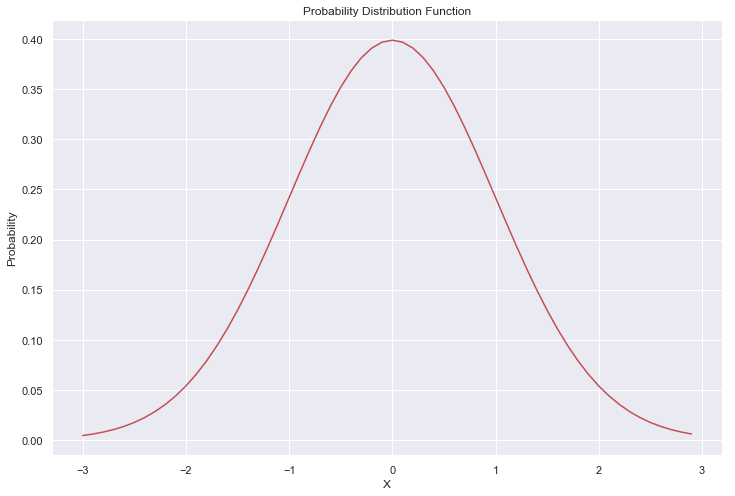

In [2]:
x = sp.arange(-3,3,0.1)
y = stats.norm.pdf(x=x,loc=0.0,scale=1.0)

plt.figure(figsize=(12,8))
plt.plot(x,y,'r')
plt.xlabel('X')
plt.ylabel('Probability')
plt.title('Probability Distribution Function');

In [3]:
np.random.seed(1)
n_samples = 3000

data = np.random.normal(loc=0.0, scale=1.0, size=n_samples)
data = pd.DataFrame(data)

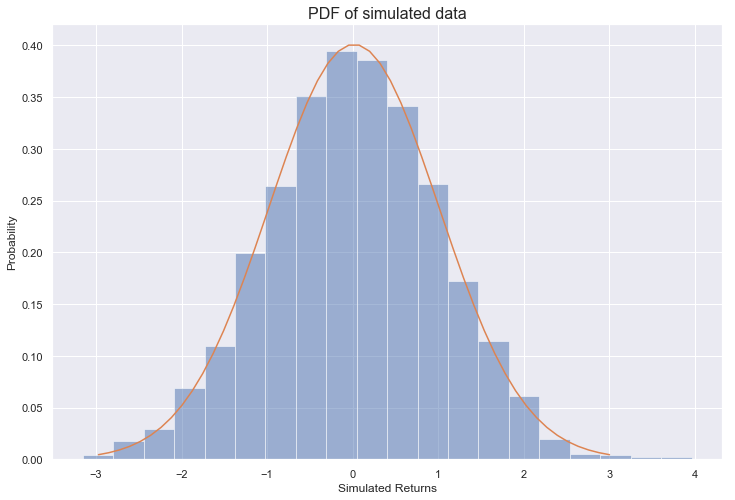

In [4]:
mean = data.mean()
stddev = data.std()

data.hist(bins=20, density=True, alpha=0.5, figsize=(12,8))
x = np.linspace(mean-3*stddev, mean+3*stddev)
y = norm.pdf(x, mean, stddev)

plt.plot(x, y)
plt.title('PDF of simulated data',fontsize=16)
plt.xlabel('Simulated Returns')
plt.ylabel('Probability');

In [5]:
tickers = ['AAPL','IBM','MSFT']
data = web.DataReader(tickers,'yahoo','01/01/2010','10/18/2019')['Adj Close']
rets = data.pct_change().dropna()

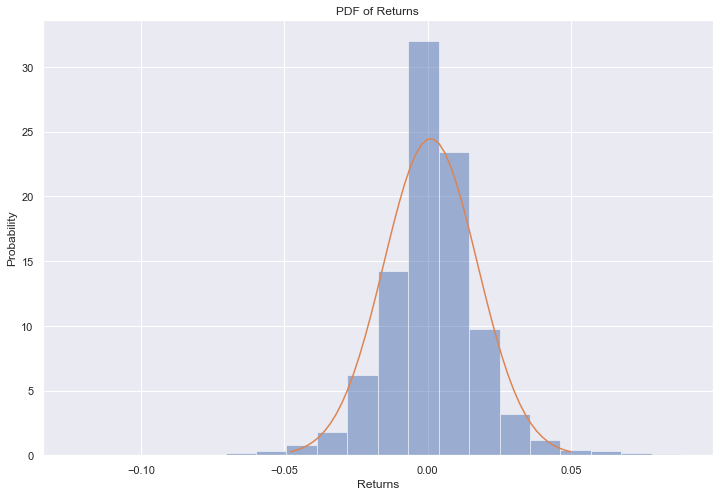

In [6]:
mean = rets['AAPL'].mean()
stddev = rets['AAPL'].std()

rets['AAPL'].hist(bins=20, density=True, alpha=0.5, figsize=(12,8))
x = np.linspace(mean-3*stddev, mean+3*stddev)
y = norm.pdf(x,mean,stddev)
plt.plot(x, y)
plt.title('PDF of Returns')
plt.xlabel('Returns')
plt.ylabel('Probability');

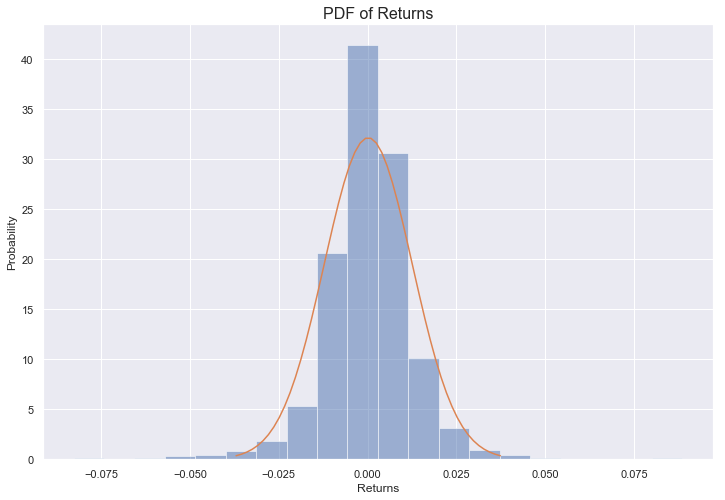

In [7]:
mean = rets['IBM'].mean()
stddev = rets['IBM'].std()

rets['IBM'].hist(bins=20, density=True, alpha=0.5,figsize=(12,8))
x = np.linspace(mean-3*stddev, mean+3*stddev)
y = norm.pdf(x,mean,stddev)
plt.plot(x, y)
plt.title('PDF of Returns',fontsize=16)
plt.xlabel('Returns')
plt.ylabel('Probability');

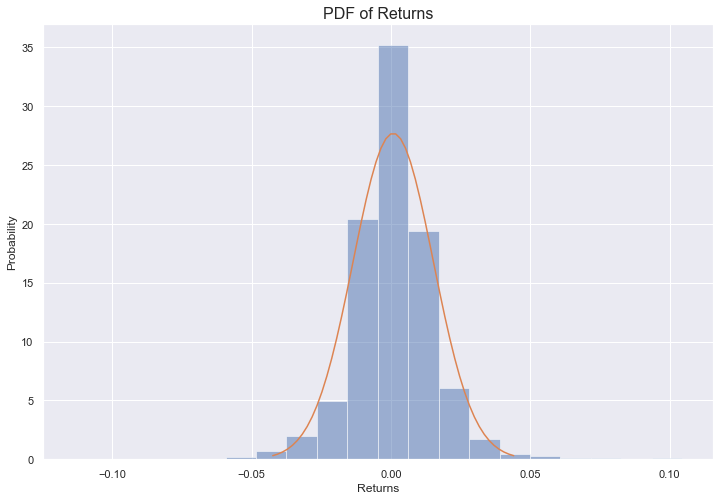

In [8]:
mean = rets['MSFT'].mean()
stddev = rets['MSFT'].std()

rets['MSFT'].hist(bins=20, density=True, alpha=0.5,figsize=(12,8))
x = np.linspace(mean-3*stddev, mean+3*stddev)
y = norm.pdf(x,mean,stddev)
plt.plot(x, y)
plt.title('PDF of Returns',fontsize=16)
plt.xlabel('Returns')
plt.ylabel('Probability');

In [9]:
np.random.seed(1)
n_samples = 3000
data = stats.norm.rvs(size=n_samples, random_state=1234)

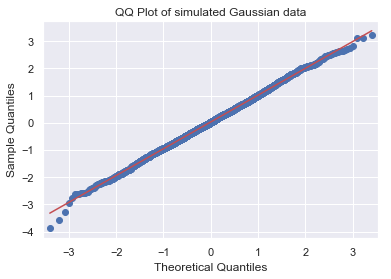

In [10]:
sm.qqplot(data,line='s')
plt.title('QQ Plot of simulated Gaussian data');

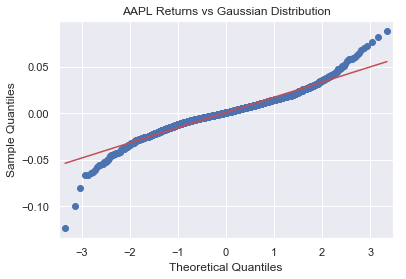

In [11]:
sm.qqplot(rets['AAPL'],line='s')
plt.title('AAPL Returns vs Gaussian Distribution');

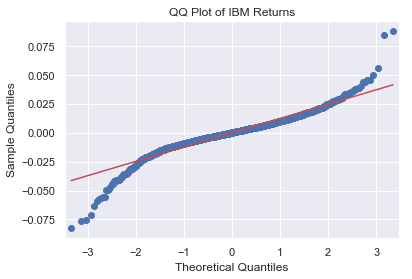

In [12]:
sm.qqplot(rets['IBM'],line='s')
plt.title('QQ Plot of IBM Returns');

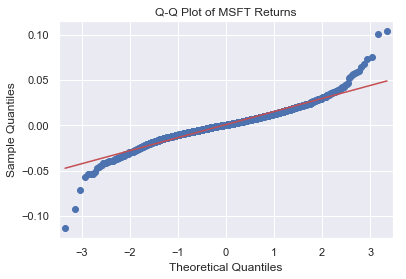

In [13]:
sm.qqplot(rets['MSFT'],line='s')
plt.title('Q-Q Plot of MSFT Returns');